# Deploying a Machine Learning Model Using Flask
## Iris Classification
This notebook is used as personal practice for deploying models using flask.  Uses this [post](https://deveshsurve.medium.com/flask-with-colab-machine-learning-iris-classification-1368faf7e217) as a rough outline.

In [1]:
# import necessary libraries
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load iris dataset from sklearn as dataframe
iris = datasets.load_iris()

In [3]:
# we can get a detailed description of the dataset
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
# pull some information from the dataset
print(f'Target Classes: {iris.target_names}')
print(f'Features: {iris.feature_names}')

Target Classes: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# separate target from features
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.DataFrame(data=iris.target, columns=['labels'])
df = pd.concat([X, y], axis=1)

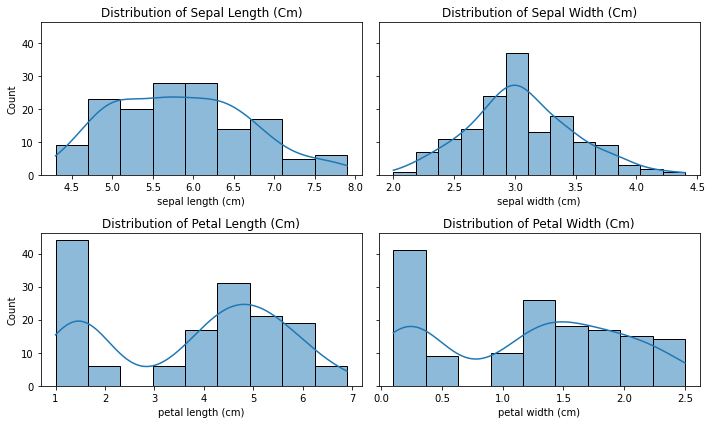

In [6]:
# look at distributions of features
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 6), sharey=True)
for feat, ax in zip(X.columns, axes.flatten()):
    sns.histplot(X[feat], kde=True, ax=ax, bins='auto')
    ax.set_title(f'Distribution of {feat.title()}')
plt.tight_layout()
plt.show()

In [7]:
temp = df.copy()
labels = list(iris.target_names)
temp['species'] = temp['labels'].apply(lambda x: labels[x].title())

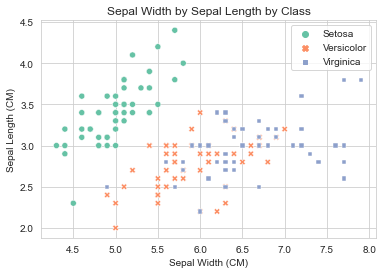

In [8]:
# plot sepal length vs. sepal width and use classes as colors
sns.set_style('whitegrid')
g  = sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                     data=temp, hue='species', style='species', palette='Set2')
plt.legend()
plt.xlabel('Sepal Width (CM)')
plt.ylabel('Sepal Length (CM)')
plt.title('Sepal Width by Sepal Length by Class')
plt.show()

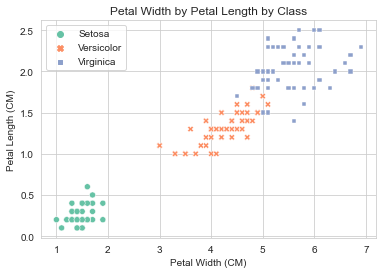

In [9]:
# repeat this plot for petal length and width
sns.set_style('whitegrid')
g  = sns.scatterplot(x='petal length (cm)', y='petal width (cm)', 
                     data=temp, hue='species', style='species', palette='Set2')
plt.legend()
plt.xlabel('Petal Width (CM)')
plt.ylabel('Petal Length (CM)')
plt.title('Petal Width by Petal Length by Class')
plt.show()

In [14]:
# Separate into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = df['labels']
X = df.drop('labels', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [15]:
# we will be using KNN so scaling is necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.92


In [34]:
def score(sample):
    np_sample = np.array(sample)
    pred = clf.predict(np_sample.reshape(1,-1))
    return list(iris.target_names)[pred[0]]

In [35]:
score([0,4,4,0])

'virginica'